In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('C:/Data Analyst/Generic_ML_Project/Notebook/Data/StudentsPerformance.csv')

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.isnull().sum()

#there is no missing vals in this dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
cat_cols=[col for col in data.columns if data[col].dtype=='O']
print(cat_cols)
for col in cat_cols:
    
    print(data[col].value_counts(),'\n')

gender
female    518
male      482
Name: count, dtype: int64 

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

test preparation course
none         642
completed    358
Name: count, dtype: int64 



In [ ]:
#adding total score and average
data['Total score']= data['math score']+data['reading score']+data['writing score']
data['average']=data['Total score']/3
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [ ]:
reading_full = data[data['reading score'] == 100]['average'].count()
math_full = data[data['math score'] == 100]['average'].count()
writing_full = data[data['writing score'] == 100]['average'].count()

print(f"Students with 100 in Reading: {reading_full}")
print(f"Students with 100 in Math: {math_full}")
print(f"Students with 100 in Writing: {writing_full}")


Students with 100 in Reading: 17
Students with 100 in Math: 7
Students with 100 in Writing: 14


In [ ]:
reading_less = data[data['reading score'] <=20]['average'].count()
math_less = data[data['math score'] <=20]['average'].count()
writing_less = data[data['writing score'] <=20]['average'].count()

print(f"Students with 100 in Reading: {reading_less}")
print(f"Students with 100 in Math: {math_less}")
print(f"Students with 100 in Writing: {writing_less}")

Students with 100 in Reading: 1
Students with 100 in Math: 4
Students with 100 in Writing: 3


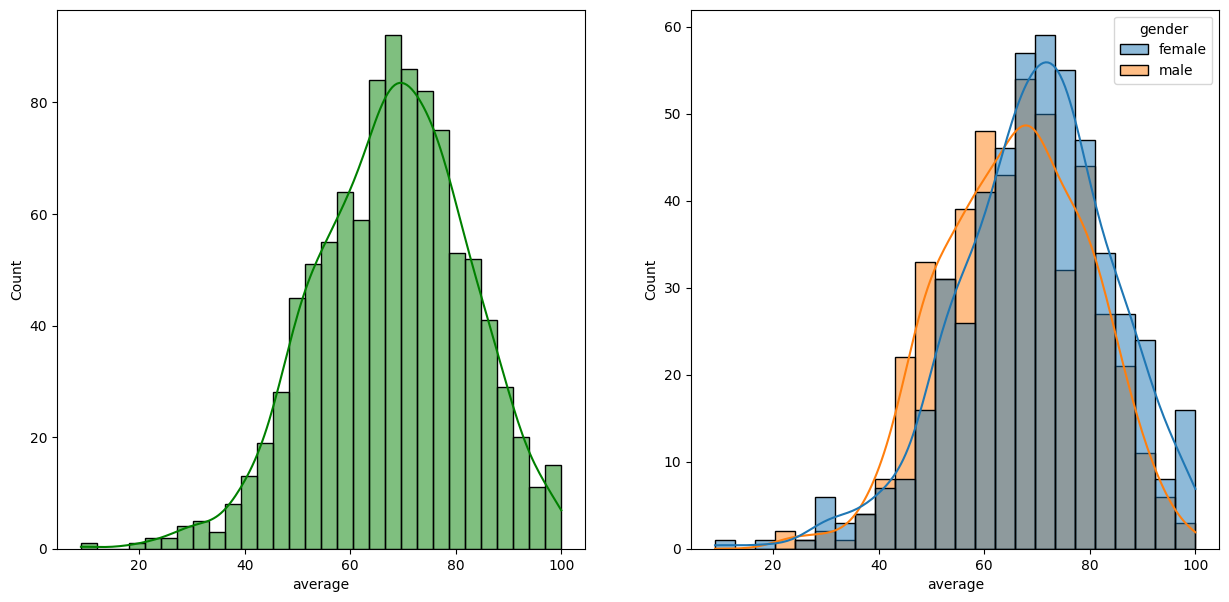

In [ ]:
# histogram

fig, axes= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()


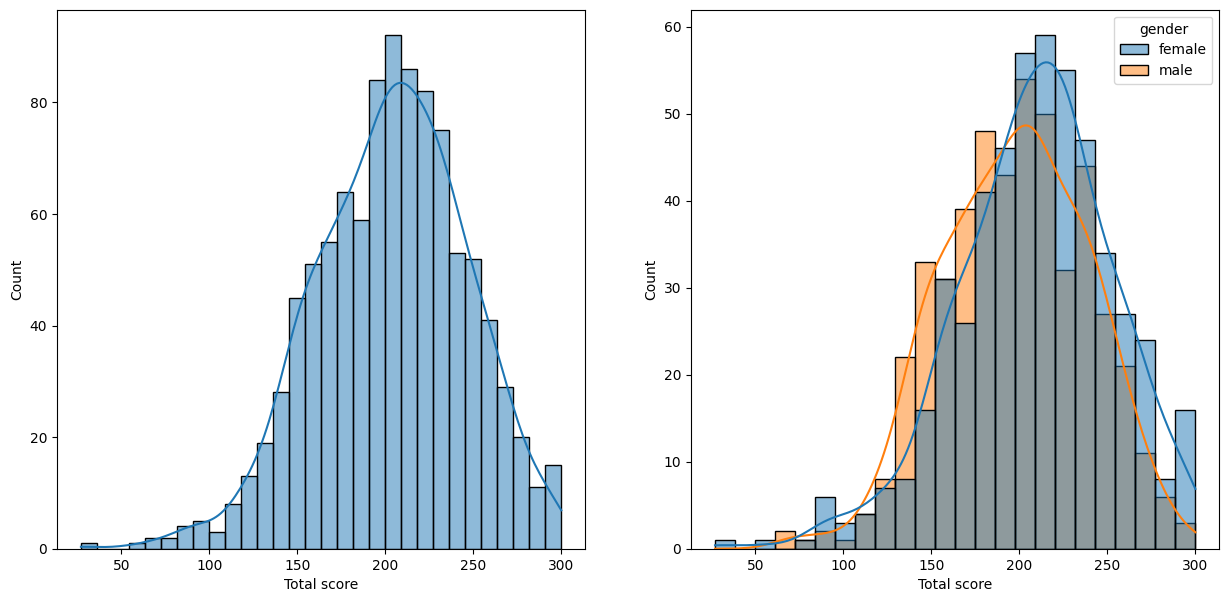

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=data,x='Total score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(data=data,x='Total score',hue='gender',kde=True)

plt.show()

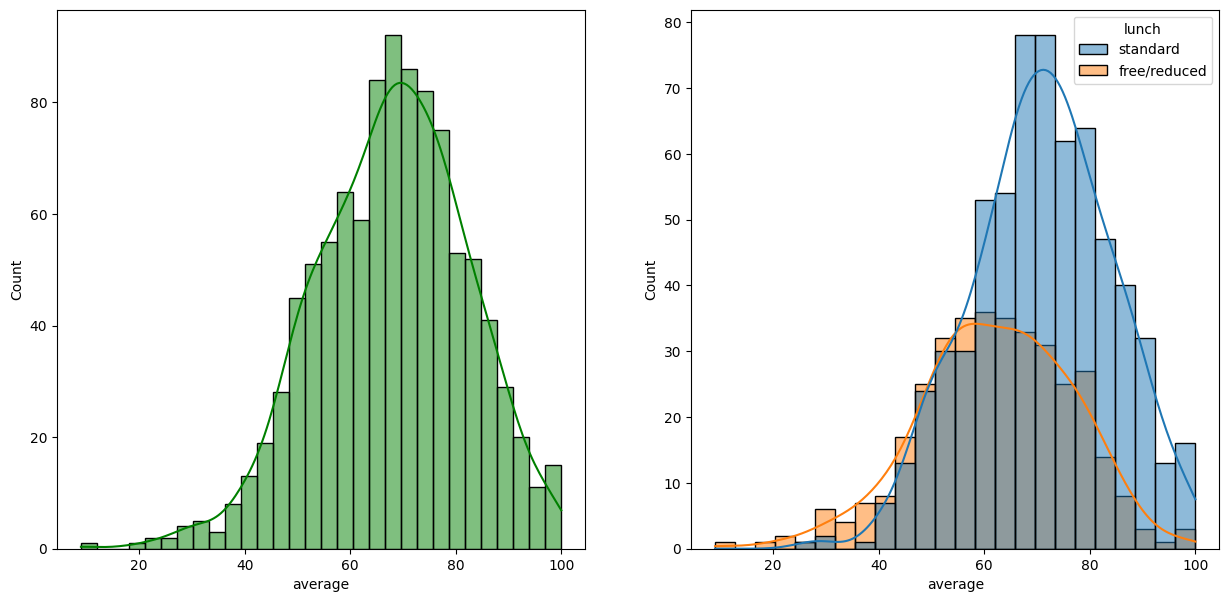

In [ ]:
fig, axes= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='lunch')
plt.show()


In [ ]:
data.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


<Axes: xlabel='race/ethnicity', ylabel='Total score'>

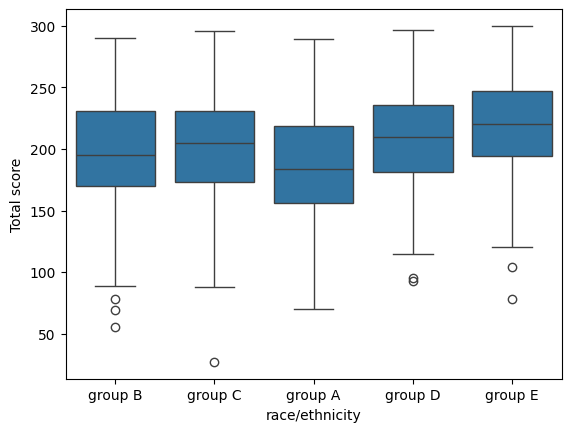

In [ ]:
sns.boxplot(data=data,x='race/ethnicity', y='Total score')

<Axes: xlabel='race/ethnicity', ylabel='Total score'>

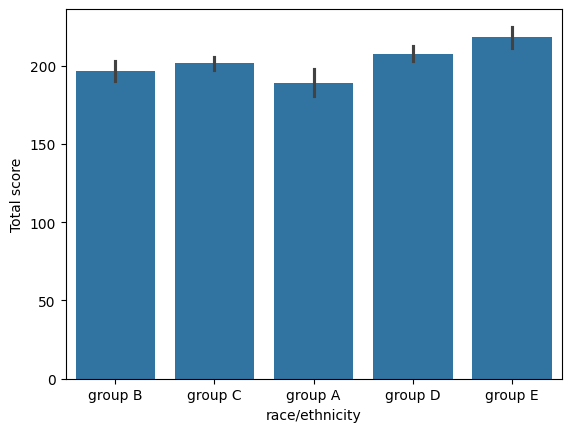

In [ ]:
sns.barplot(data=data,x='race/ethnicity', y='Total score')


<Axes: xlabel='parental level of education', ylabel='Total score'>

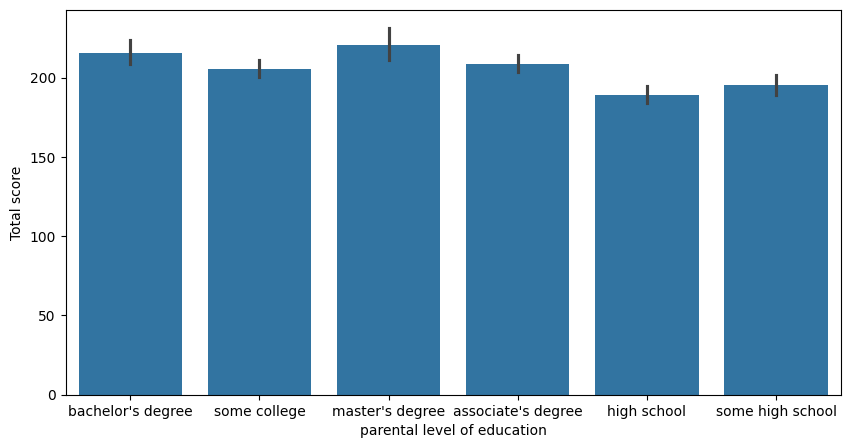

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='Total score', x='parental level of education')


<Axes: xlabel='test preparation course', ylabel='Total score'>

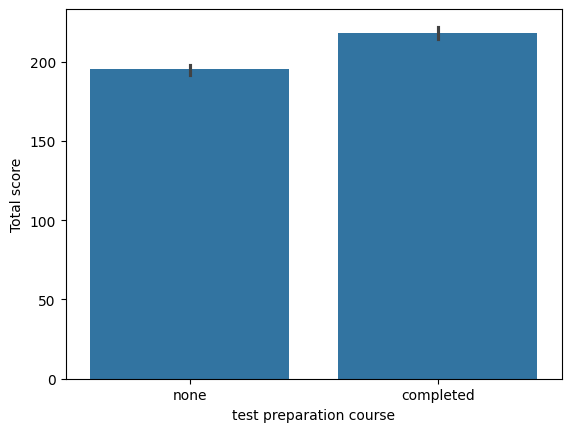

In [ ]:
sns.barplot(data=data,x='test preparation course', y='Total score')


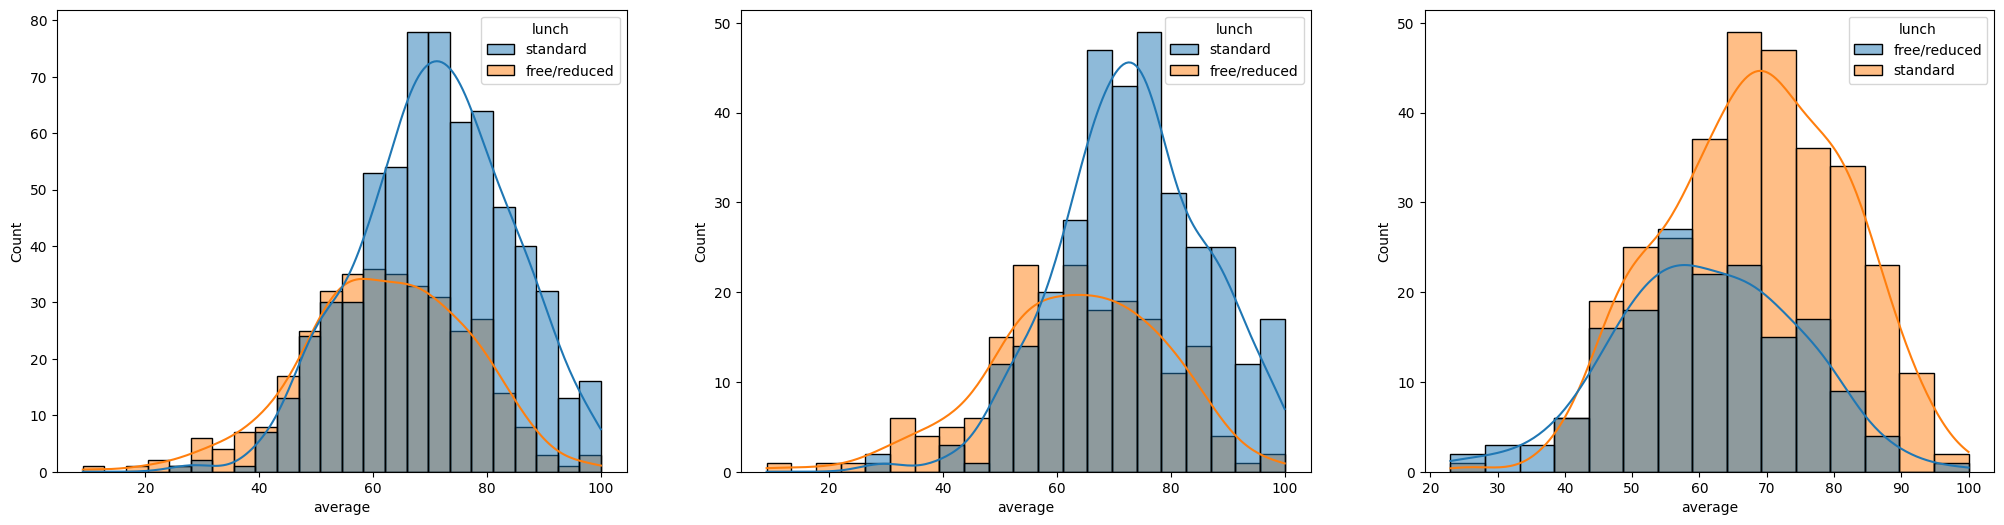

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=data,x='average',hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [ ]:
#standard lunch helps in performing better in exams be it male or female.

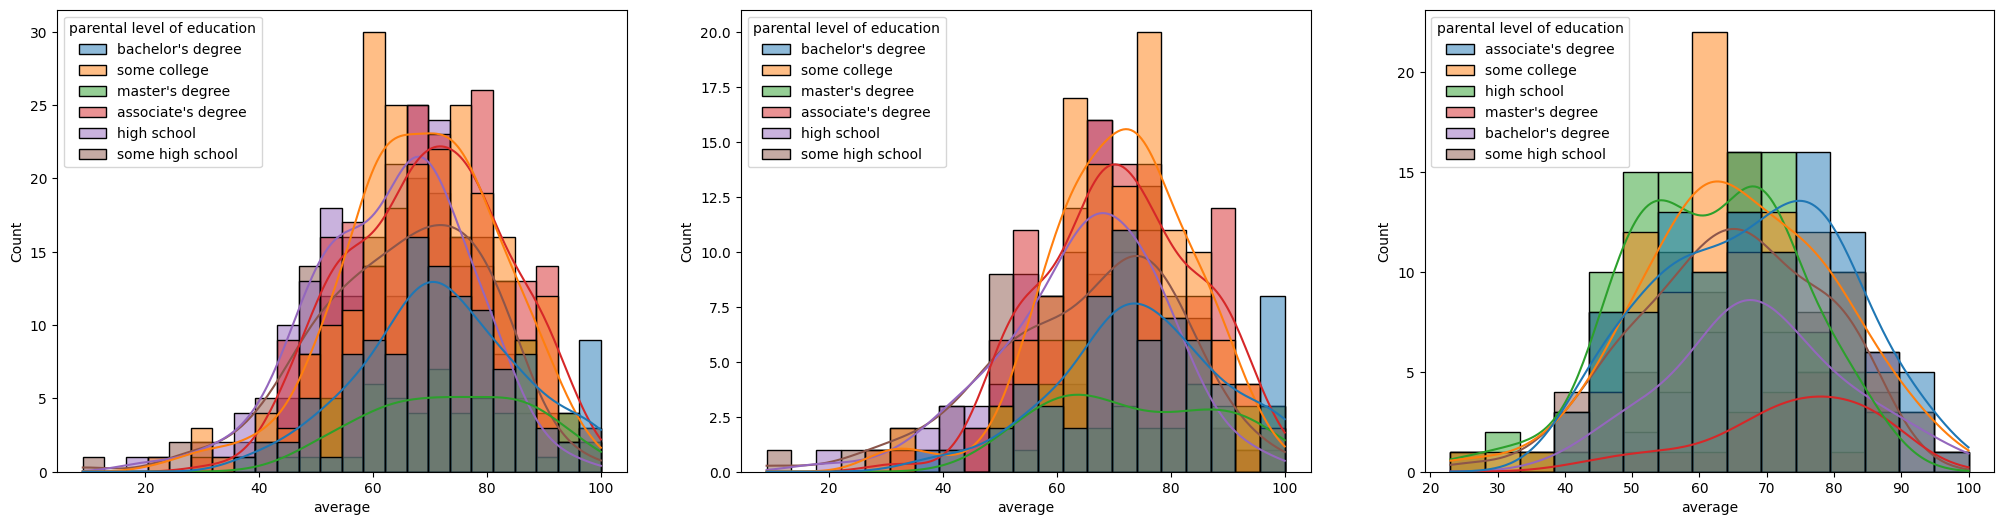

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=data,x='average',hue='parental level of education',kde=True)
plt.subplot(132)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

<Axes: title={'center': 'writing score'}, ylabel='writing score'>

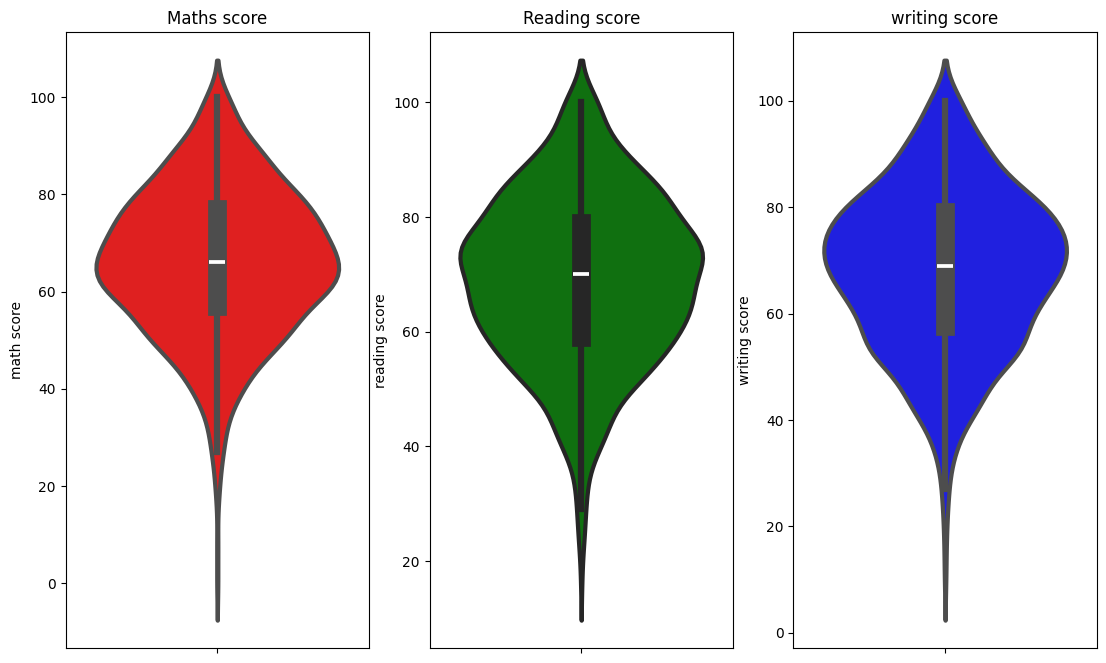

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Maths score')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing score')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)

In [ ]:
#observation : in maths mostly student's score lies between 60-80 where as in other subjects the score lies bw 50-80

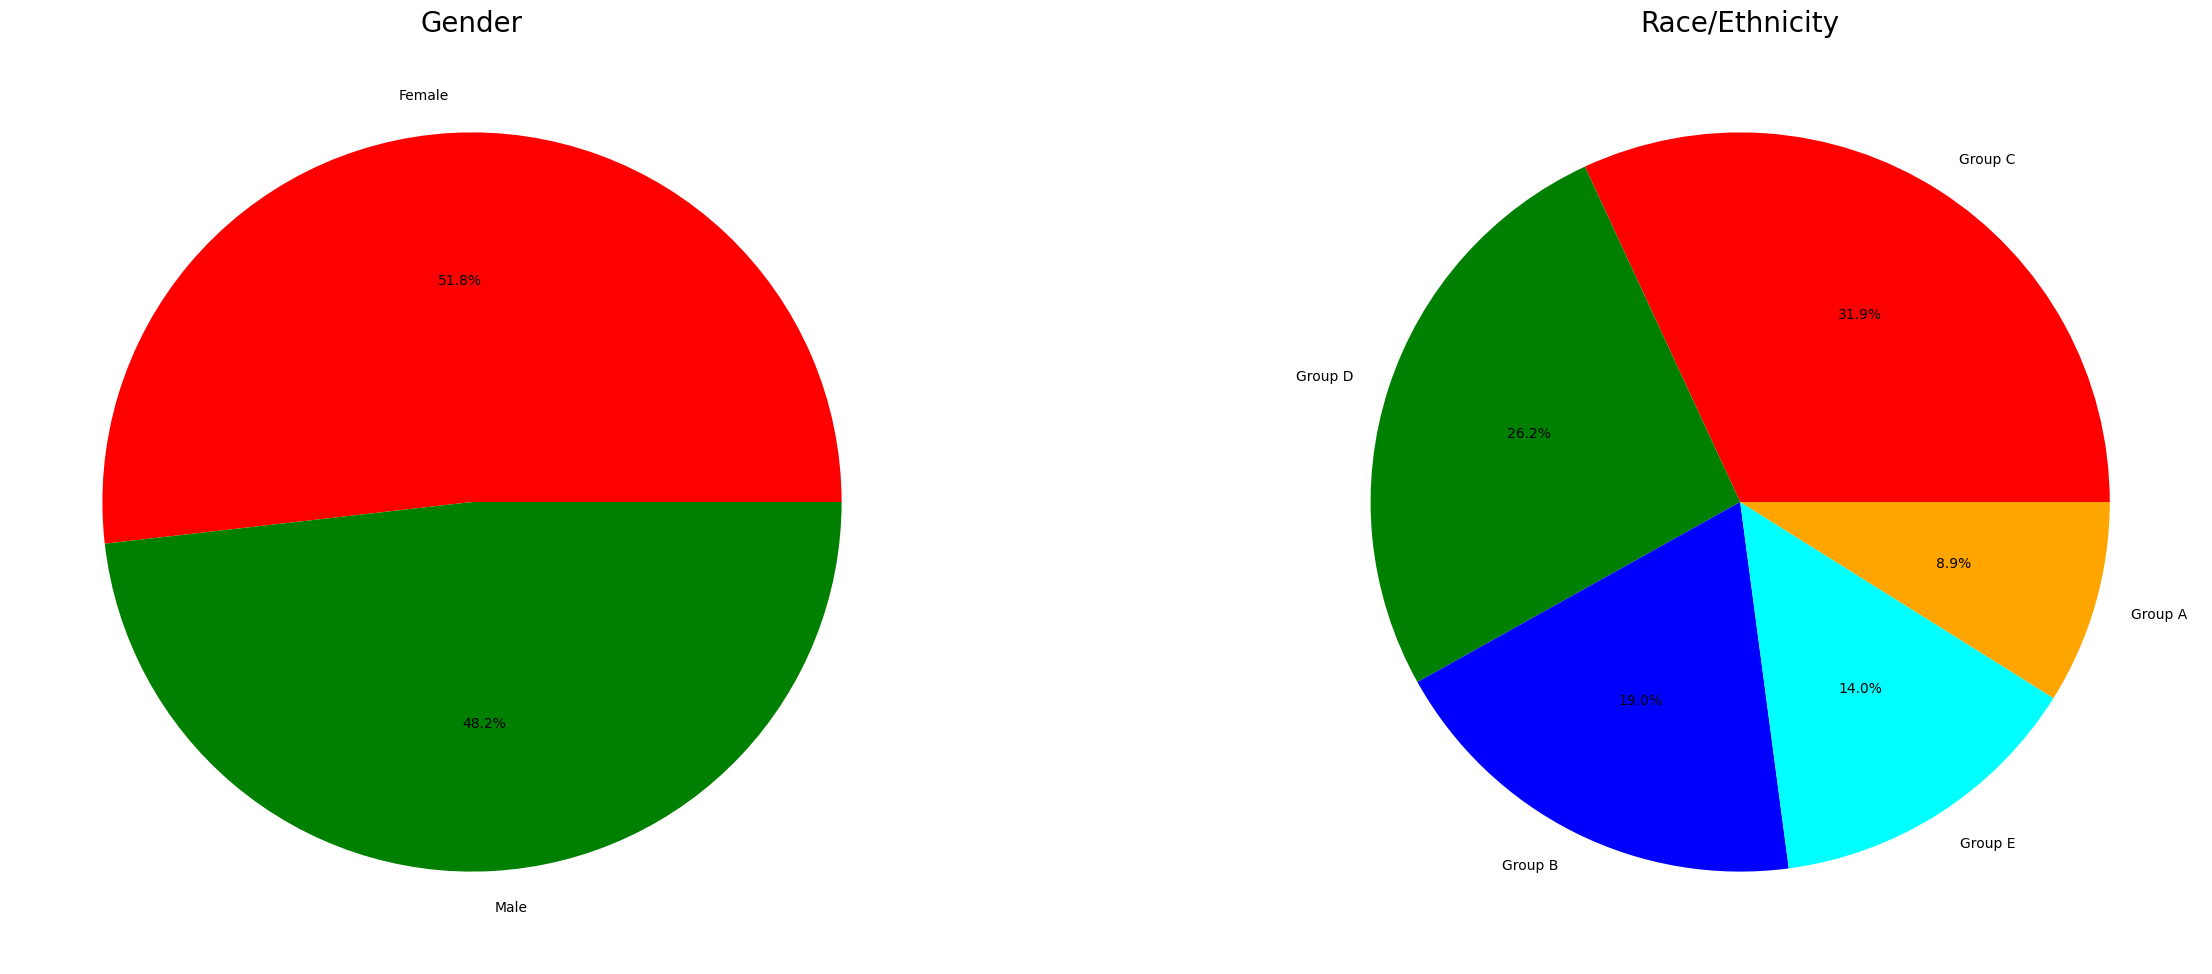

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

# Gender Pie Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
size = data['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
size = data['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.show()

